<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Дополнительные-вводные:" data-toc-modified-id="Дополнительные-вводные:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Дополнительные вводные:</a></span></li><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li><li><span><a href="#В-результате-должно-быть-3-файла:" data-toc-modified-id="В-результате-должно-быть-3-файла:-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>В результате должно быть 3 файла:</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2." data-toc-modified-id="Задание-2.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2.</a></span></li><li><span><a href="#Задание-3." data-toc-modified-id="Задание-3.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 3.</a></span></li><li><span><a href="#Задание-4." data-toc-modified-id="Задание-4.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 4.</a></span></li><li><span><a href="#Задание-5." data-toc-modified-id="Задание-5.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 5.</a></span></li><li><span><a href="#Задание-6." data-toc-modified-id="Задание-6.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 6.</a></span></li></ul></div>

In [40]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

In [41]:
import wget

In [42]:
# t = yf.Ticker("CL=F")

In [43]:
t = yf.Ticker("eth-usd")

In [44]:
t.hist = t.history(period="max")

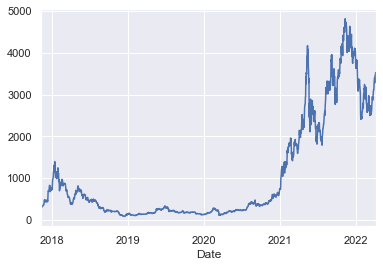

In [45]:
t.history(period='max').Close.plot();

In [46]:
url = "http://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01235&From=01.03.2010&To=26.03.2022&FromDate=03%2F01%2F2010&ToDate=03%2F26%2F2022"

In [47]:
#curs = pd.read_excel(wget.download(url))

In [48]:
#curs


# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [49]:


# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [50]:
oil = yf.download('BZ=F').reset_index()
oil = oil[['Date','Adj Close']].copy()

[*********************100%***********************]  1 of 1 completed


In [51]:
usd_eur = yf.download('usdeur=x').reset_index()
usd_eur = usd_eur[['Date','Adj Close']]
usd_eur = usd_eur[usd_eur['Date']>='2007-07-30'].copy()

[*********************100%***********************]  1 of 1 completed


In [52]:
fca_vbp = oil.merge(usd_eur, on='Date')
fca_vbp['1_t_fca'] = 16*(fca_vbp['Adj Close_x']*fca_vbp['Adj Close_y'])+PRODUCTION_COST
fca_vbp = fca_vbp[['Date','1_t_fca']].copy()

<AxesSubplot:xlabel='Date'>

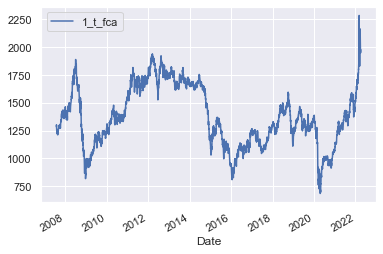

In [53]:
fca_vbp.plot(x='Date',y='1_t_fca')

In [54]:
customers = pd.DataFrame(customers)
customers = customers.T
customers = customers.reset_index()

In [55]:
customers['fca'] = fca_vbp.iloc[fca_vbp.index.max(),1]

In [56]:
customers['payments'] = (customers['fca']*customers['volumes'])

In [57]:
i = usd_eur.iloc[usd_eur.index.max()-953, 1]
#1
customers['DDP'] = (customers['location']=='EU')* (customers['payments'] + EU_LOGISTIC_COST_EUR)
#2
customers['DDP'] = customers['DDP'] + (customers['location']=='CN')* (customers['payments'] + CN_LOGISTIC_COST_USD*i)
#во втором случае скорректировали стоимость с доставкой доставки (выразили в евро)

In [58]:
#запись в excel
writer = pd.ExcelWriter('for_customers.xlsx')
for i, j in enumerate(customers['index']):
    customers[i:i+1].to_excel(writer,j)
writer.save()
writer.close()

C:\Users\user\anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# Задание 2. 

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [59]:
# 

# Задание 3. 
К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [60]:
# 

# Задание 4. 

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [61]:
# 

# Задание 5.

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [62]:
# import yourpackage

# Задание 6. 

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [63]:
# !pip install yourpackage
# import yourpackage